# Data Collection

In [1]:
import os
import time
import uuid
import cv2

In [3]:
'''IMAGE_PATH = os.path.join('data', 'images')
number_images = 30'''

In [4]:
'''cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print("Collecting image {}".format(imgnum))
    ret, frame = cap.read()
    imagename = os.path.join(IMAGE_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imagename, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()'''

In [ ]:
!labelme

# Data Augmentation

In [2]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

In [5]:
'''images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle = False)'''

"images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle = False)"

In [6]:
images.as_numpy_iterator().next()

NameError: name 'images' is not defined

In [22]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [7]:
'''images = images.map(load_image)
images.as_numpy_iterator().next()'''

'images = images.map(load_image)\nimages.as_numpy_iterator().next()'

In [4]:
image_generator = images.batch(4).as_numpy_iterator()

NameError: name 'images' is not defined

In [ ]:
plot_images = image_generator.next()

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [39]:
'''for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)'''

In [3]:
import albumentations as alb

In [4]:
augmentor = alb.Compose([alb.RandomCrop(width = 450, height = 450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                        bbox_params = alb.BboxParams(format = 'albumentations', label_fields=['class_labels']))

In [5]:
img = cv2.imread(os.path.join('data', 'train', 'images', '02b22ba5-e0ec-11ee-8e89-7497792a9a4e.jpg'))

In [6]:
with open(os.path.join('data', 'train', 'labels', '02b22ba5-e0ec-11ee-8e89-7497792a9a4e.json'), 'r') as f:
    label = json.load(f)

In [7]:
label['shapes'][0]['points']

[[212.5925925925926, 67.7777777777778], [400.5555555555556, 332.5925925925926]]

In [8]:
img

array([[[72, 71, 81],
        [73, 72, 82],
        [73, 72, 82],
        ...,
        [90, 84, 89],
        [91, 85, 90],
        [91, 85, 90]],

       [[73, 72, 82],
        [73, 72, 82],
        [73, 72, 82],
        ...,
        [90, 84, 89],
        [91, 85, 90],
        [91, 85, 90]],

       [[74, 73, 83],
        [73, 72, 82],
        [72, 71, 81],
        ...,
        [90, 83, 90],
        [90, 83, 90],
        [91, 84, 91]],

       ...,

       [[11, 10, 12],
        [11, 10, 12],
        [11, 10, 12],
        ...,
        [50, 45, 44],
        [49, 44, 43],
        [48, 43, 42]],

       [[11, 10, 12],
        [11, 10, 12],
        [11, 10, 12],
        ...,
        [50, 45, 44],
        [49, 44, 43],
        [48, 43, 42]],

       [[11, 10, 12],
        [11, 10, 12],
        [11, 10, 12],
        ...,
        [50, 45, 44],
        [49, 44, 43],
        [49, 44, 43]]], dtype=uint8)

In [9]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]
coords

[212.5925925925926, 67.7777777777778, 400.5555555555556, 332.5925925925926]

In [10]:
coords = list(np.divide(coords, [640,480,640,480]))
coords

[0.33217592592592593,
 0.14120370370370375,
 0.6258680555555556,
 0.6929012345679013]

In [11]:
augmented = augmentor(image = img, bboxes = [coords], class_labels = ['faces'])

In [12]:
augmented

{'image': array([[[80, 40, 34],
         [79, 39, 33],
         [80, 40, 34],
         ...,
         [57, 42, 56],
         [56, 41, 55],
         [55, 40, 54]],
 
        [[83, 41, 33],
         [81, 39, 31],
         [82, 40, 32],
         ...,
         [59, 43, 57],
         [60, 44, 58],
         [58, 42, 56]],
 
        [[83, 41, 33],
         [86, 44, 36],
         [86, 44, 36],
         ...,
         [58, 42, 56],
         [58, 42, 56],
         [57, 41, 55]],
 
        ...,
 
        [[63, 48, 75],
         [63, 48, 75],
         [64, 49, 76],
         ...,
         [84, 70, 94],
         [84, 70, 94],
         [84, 70, 94]],
 
        [[63, 48, 75],
         [62, 47, 74],
         [63, 48, 75],
         ...,
         [85, 71, 95],
         [85, 71, 95],
         [83, 69, 93]],
 
        [[64, 49, 76],
         [64, 49, 76],
         [64, 49, 76],
         ...,
         [85, 69, 93],
         [86, 70, 94],
         [87, 71, 95]]], dtype=uint8),
 'bboxes': [(0.13687242798353913,

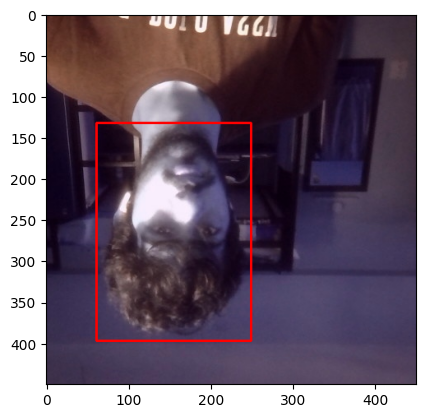

In [13]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),
              (255,0,0), 2)
plt.imshow(augmented['image'])

In [25]:
'''for partition in ['train', 'test', 'val']:
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,450,640,450]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1

                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0

                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)


        except Exception as e:
            print(e)'''

Expected y_max for bbox [0.0008680555555555883, 0.44279835390946504, 0.13975694444444448, 1.0209876543209877, 'face'] to be in the range [0.0, 1.0], got 1.0209876543209877.
Expected y_max for bbox [0.005208333333333365, 0.5333333333333334, 0.09635416666666669, 1.039506172839506, 'face'] to be in the range [0.0, 1.0], got 1.039506172839506.
Expected y_max for bbox [0.003761574074074107, 0.5950617283950619, 0.06597222222222224, 1.0209876543209877, 'face'] to be in the range [0.0, 1.0], got 1.0209876543209877.


In [23]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle = False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [24]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle = False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [25]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle = False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [26]:
train_images.as_numpy_iterator().next()

array([[[0.18976715, 0.19368872, 0.20153186],
        [0.18872549, 0.19087009, 0.19871323],
        [0.18872549, 0.18872549, 0.19656862],
        ...,
        [0.07843138, 0.04705882, 0.03676471],
        [0.07107843, 0.05147059, 0.0372549 ],
        [0.05582108, 0.0401348 , 0.03327206]],

       [[0.19981618, 0.20245098, 0.21029411],
        [0.19178921, 0.19227941, 0.20012255],
        [0.1896446 , 0.19356617, 0.20140931],
        ...,
        [0.07794118, 0.04656863, 0.03872549],
        [0.06672794, 0.04669118, 0.03621323],
        [0.05814951, 0.03952206, 0.03707108]],

       [[0.19001226, 0.19393383, 0.20177697],
        [0.1896446 , 0.19356617, 0.20140931],
        [0.19571078, 0.19963235, 0.20747548],
        ...,
        [0.07107843, 0.03970588, 0.03186275],
        [0.06666667, 0.04313726, 0.04313726],
        [0.06127451, 0.04264706, 0.04019608]],

       ...,

       [[0.32567403, 0.30214462, 0.3178309 ],
        [0.33425245, 0.31072304, 0.3264093 ],
        [0.32892156, 0

In [27]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)

    return [label['class']], label['bbox']

In [28]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle = False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [29]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle = False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [30]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle = False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [31]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.2281, 0.2098, 0.65  , 0.811 ], dtype=float16))

In [32]:
len(train_images), len(train_labels), len(val_images), len(val_labels), len(test_images), len(test_labels)

(3840, 3840, 660, 660, 720, 720)

In [33]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [34]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(5000)
test = test.batch(8)
test = test.prefetch(4)

In [35]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(5000)
val = val.batch(8)
val = val.prefetch(4)

In [36]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

In [37]:
data_samples = train.as_numpy_iterator()

In [38]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


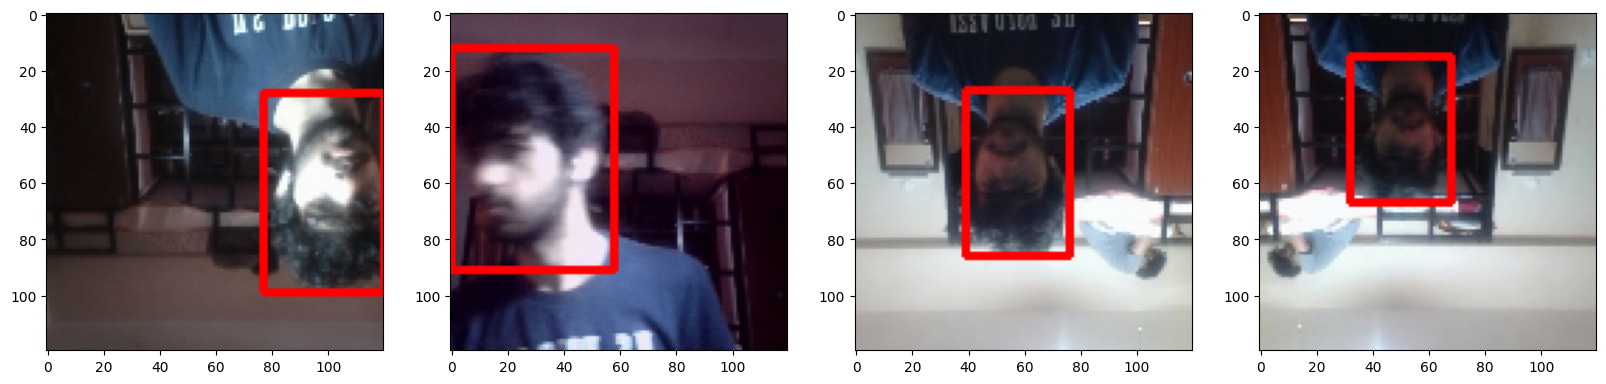

In [39]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx in range(4):
    sample_image = res[0][idx].copy()
    sample_coords = res[1][1][idx]

    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                  (255,0,0), 2)
    ax[idx].imshow(sample_image)

# Model Building and Training

In [53]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D, Dense, Flatten, Add, GlobalMaxPooling2D, Dropout, ReLU
from tensorflow.keras.applications import VGG16

In [54]:
def build_model():
    input = Input(shape=(120,120,3))
    vgg = VGG16(include_top = False)(input)

    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation = 'relu')(f1)
    class2 = Dense(1, activation = 'sigmoid')(class1)

    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation = 'relu')(f1)
    regress2 = Dense(4, activation = 'sigmoid')(regress1)

    facetracker = Model(inputs = input, outputs = [class2, regress2])
    return facetracker

In [55]:
facetracker = build_model()

In [56]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_1[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [57]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 - 1)/batches_per_epoch

In [58]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate = 0.0001, decay = lr_decay)

In [59]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]
    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))

    return delta_coord + delta_size

In [60]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [61]:
class FaceTracker(Model):
    def __init__(self, facetrack, **kwargs):
        super().__init__(**kwargs)
        self.model = facetrack

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localization_loss
        self.opt = opt

    def train_step(self, batch, **kwargs):
        X,y = batch
        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training = True)

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss + 0.5*batch_classloss
            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        return {"Total_loss": total_loss, "class_loss": batch_classloss, "regress_loss":batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X,y = batch
        
        classes, coords = self.model(X, training = True)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

        total_loss = batch_localizationloss + 0.5*batch_classloss
        return {"Total_loss": total_loss, "class_loss": batch_classloss, "regress_loss":batch_localizationloss}


    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [62]:
model = FaceTracker(facetracker)

In [63]:
model.compile(opt, classloss, regressloss)

In [43]:
logdir = 'logs'

In [44]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [45]:
hist = model.fit(train, epochs = 30, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/30
480/480 [==============================] - 544s 1s/step - Total_loss: 0.1603 - class_loss: 0.0311 - regress_loss: 0.1447 - val_Total_loss: 0.0225 - val_class_loss: 7.8225e-05 - val_regress_loss: 0.0224
Epoch 2/30
480/480 [==============================] - 636s 1s/step - Total_loss: 0.0568 - class_loss: 0.0140 - regress_loss: 0.0498 - val_Total_loss: 0.0087 - val_class_loss: 3.3092e-04 - val_regress_loss: 0.0085
Epoch 3/30
480/480 [==============================] - 538s 1s/step - Total_loss: 0.0281 - class_loss: 0.0033 - regress_loss: 0.0265 - val_Total_loss: 0.0072 - val_class_loss: 1.1214e-04 - val_regress_loss: 0.0072
Epoch 4/30
480/480 [==============================] - 576s 1s/step - Total_loss: 0.0367 - class_loss: 0.0102 - regress_loss: 0.0316 - val_Total_loss: 0.0097 - val_class_loss: 2.6883e-05 - val_regress_loss: 0.0097
Epoch 5/30
480/480 [==============================] - 554s 1s/step - Total_loss: 0.0176 - class_loss: 0.0025 - regress_loss: 0.0164 - val_Total_loss

In [46]:
hist.history

{'Total_loss': [0.03007795475423336,
  0.006294254679232836,
  0.04585118964314461,
  0.019097859039902687,
  0.003671766724437475,
  0.00888411421328783,
  0.010210423730313778,
  0.0022807237692177296,
  0.002111300127580762,
  0.0026334344875067472,
  0.0029340297915041447,
  0.0018689861753955483,
  0.006069252733141184,
  0.0009531791438348591,
  0.001025158679112792,
  0.0011121142888441682,
  0.0004964513937011361,
  0.0009601874626241624,
  0.0008869332377798855,
  0.0016564715187996626,
  0.0018429119372740388,
  0.0011013352777808905,
  0.000499370857141912,
  0.0007889651460573077,
  0.0007954781176522374,
  0.0005821629893034697,
  0.0004931000294163823,
  0.0007298187119886279,
  0.00048739550402387977,
  0.000148143240949139],
 'class_loss': [0.0015498345019295812,
  0.0007946297992020845,
  0.018065666779875755,
  1.997544677578844e-05,
  0.00010183258564211428,
  3.9110436773626134e-05,
  9.463568858336657e-05,
  1.4156304132484365e-05,
  1.4066954463487491e-05,
  1.180

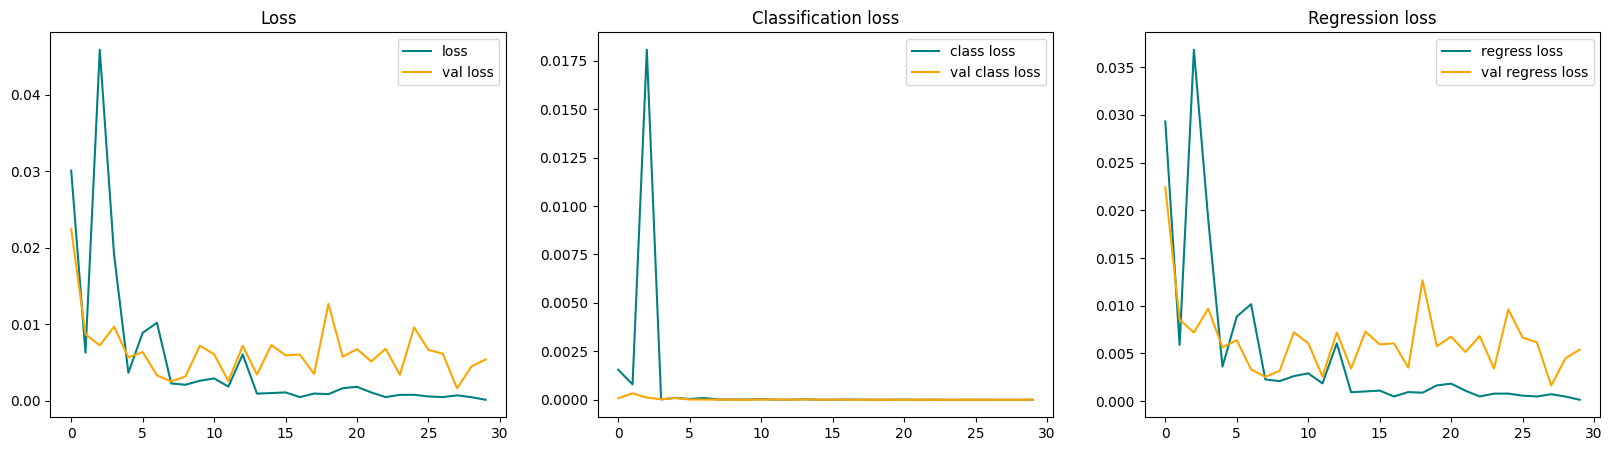

In [47]:
fix, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['Total_loss'], color = 'teal', label = 'loss')
ax[0].plot(hist.history['val_Total_loss'], color = 'orange', label ='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color = 'teal', label = 'class loss')
ax[1].plot(hist.history['val_class_loss'], color = 'orange', label ='val class loss')
ax[1].title.set_text('Classification loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color = 'teal', label = 'regress loss')
ax[2].plot(hist.history['val_regress_loss'], color = 'orange', label ='val regress loss')
ax[2].title.set_text('Regression loss')
ax[2].legend()

plt.show()

# Predictions

In [40]:
test_data = test.as_numpy_iterator()

In [45]:
test_sample = test_data.next()
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 1s 679ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


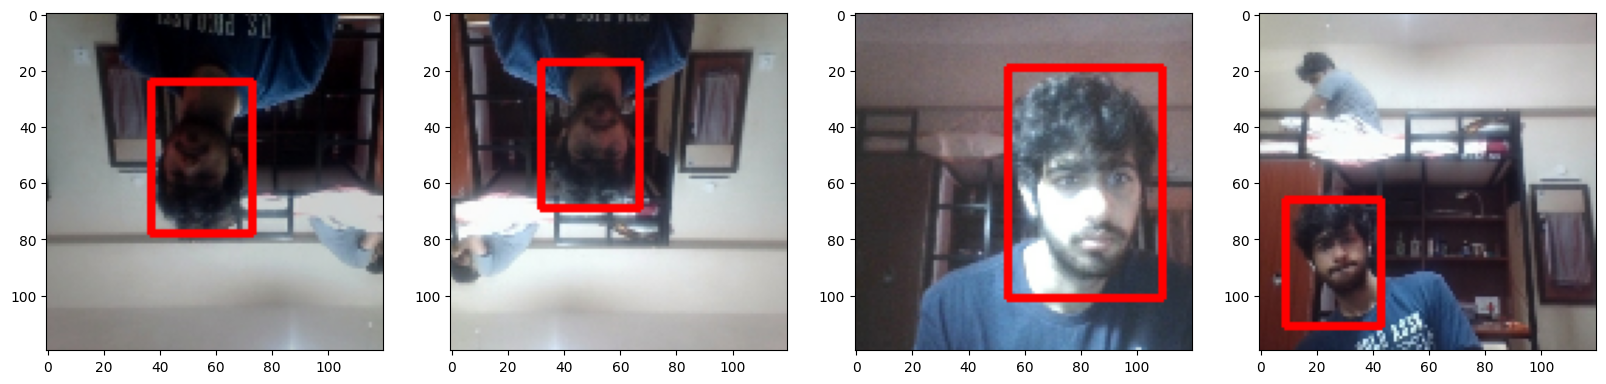

In [46]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx in range(4):
    sample_image = test_sample[0][idx]
    sample_image_copy = sample_image.copy()
    sample_coords = yhat[1][idx]

    if yhat[0][idx] > 0.5:
        cv2.rectangle(sample_image_copy,
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                      (255,0,0),2)
    ax[idx].imshow(sample_image_copy)

In [42]:
from tensorflow.keras.models import load_model

In [43]:
facetracker.save('facetracker.h5')

NameError: name 'facetracker' is not defined

In [44]:
facetracker = load_model('facetracker.h5')

In [64]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500, :]

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))

    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]

    if yhat[0] > 0.5:
        cv2.rectangle(frame,
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)),
                      (255,0,0),2)
        cv2.rectangle(frame,
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                            [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                            [80, 0])),
                      (255,0,0), -1)
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                                [0, -5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.imshow('FaceTrack', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 91ms/step


KeyboardInterrupt: 